In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Import the pipelines from the regression_pipelines module
from Regression_Model_Pipeline import create_numerical_preprocessor, create_pipelines, tune_models, evaluate_models, create_and_fit_model  
import warnings                               #ignore warnings
warnings. filterwarnings("ignore")
import seaborn as sns                         #data visualization
import matplotlib.pyplot as plt               #data visualization
from sklearn.model_selection import GridSearchCV

In [2]:
#Load your dataset
# data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/car-data-encoded.csv")
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
data_copy = data.copy()

# Convert date strings to datetime format if applicable
date_columns = data_copy.select_dtypes(include=['object']).columns.tolist()
for col in date_columns:
    try:
        data_copy[col] = pd.to_datetime(data_copy[col])
    except (ValueError, TypeError):
        # If conversion fails, you can choose to drop the column or handle it differently
        print(f"Column '{col}' could not be converted to datetime.")

# Calculate the mean of the 'wip' column
mean_wip = data_copy['wip'].mean()

# Fill missing values in 'wip' with the mean
data_copy['wip'].fillna(value=mean_wip, inplace=True)

Column 'quarter' could not be converted to datetime.
Column 'department' could not be converted to datetime.
Column 'day' could not be converted to datetime.


In [4]:
print(data_copy.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [5]:
# Please enter the Target name that you wish to use
target = 'actual_productivity'

# Step 2: Define your features (X) and target (y)
X = data_copy.drop(target, axis=1)  # Replace 'target_column' with your actual target column name
y = data_copy[target].values.reshape(-1,1)  # Your target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## This section determines which columns are categorical or numerical

In [6]:
# Drop the target column from the copy
data_copy = data_copy.drop(columns=[target]) 

# Determine categorical and numerical features
categorical_features = data_copy.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = data_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the preprocessor for just the numerical columns
num_preprocessor = create_numerical_preprocessor(numerical_features)

# Print the identified features (optional)
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['quarter', 'department', 'day']
Numerical Features: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


In [7]:
# Ensure that X_train and X_test only contain numerical features
# Remove any columns that are not numeric
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

# Check for any non-numeric columns before fitting
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')
X_test columns: Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')


In [8]:
# Fit and transform the training data
X_train_processed = num_preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = num_preprocessor.transform(X_test)

# This section fits each of the regression models

In [9]:
# Dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Elastic Net': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Gradient Boost Regression': GradientBoostingRegressor(),
    'KNeighbors Regression': KNeighborsRegressor()
}

# Create pipelines using the preprocessor and models
pipelines = create_pipelines(num_preprocessor, models)

In [10]:
metrics_df = evaluate_models(pipelines, X_train_processed, y_train, X_test_processed, y_test)

X_train shape: (897, 10)
y_train shape: (897, 1)
X_test shape: (300, 10)
y_test shape: (300, 1)
                           Training Score  Testing Score  Mean Absolute Error  Mean Squared Error  R² Score
Lasso Regression                 0.000000      -0.000685             0.128256            0.028178 -0.000685
Elastic Net                      0.000000      -0.000685             0.128256            0.028178 -0.000685
Linear Regression                0.306007       0.188046             0.109552            0.022864  0.188046
Ridge Regression                 0.305997       0.188579             0.109464            0.022849  0.188579
Support Vector Regression        0.496357       0.317175             0.095912            0.019228  0.317175
KNeighbors Regression            0.574632       0.388269             0.086326            0.017226  0.388269
Gradient Boost Regression        0.663522       0.434893             0.081950            0.015913  0.434893
Decision Tree Regression         0.88589

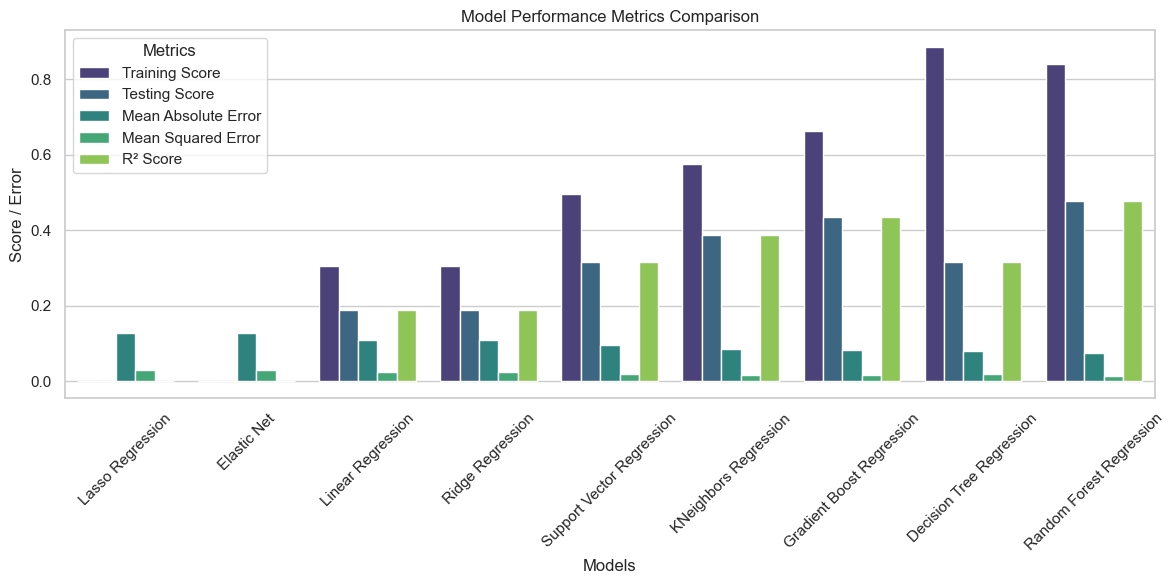

In [11]:
# Convert the dictionary to a DataFrame
# metrics_df = pd.DataFrame(performance_metrics).T

# Reset the index to have model names as a column
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame for better plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')

# Customize the plot
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score / Error')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()

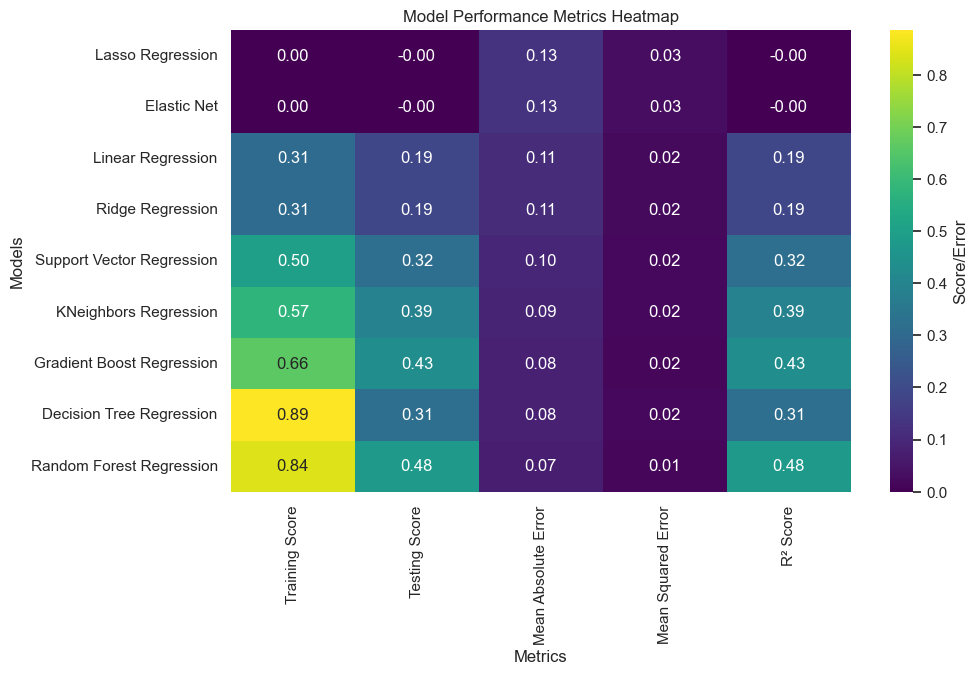

                           Training Score  Testing Score  Mean Absolute Error  \
Model                                                                           
Lasso Regression                 0.000000      -0.000685             0.128256   
Elastic Net                      0.000000      -0.000685             0.128256   
Linear Regression                0.306007       0.188046             0.109552   
Ridge Regression                 0.305997       0.188579             0.109464   
Support Vector Regression        0.496357       0.317175             0.095912   
KNeighbors Regression            0.574632       0.388269             0.086326   
Gradient Boost Regression        0.663522       0.434893             0.081950   
Decision Tree Regression         0.885893       0.314978             0.079652   
Random Forest Regression         0.840723       0.476603             0.074872   

                           Mean Squared Error  R² Score  
Model                                             

In [12]:
# Reset the index and drop the old index
metrics_df.reset_index(drop=True, inplace=True)

# Rename the first column to 'Model' if it's not already named
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Set 'Model' as the index
metrics_df.set_index('Model', inplace=True)

# Create a heatmap with only numeric data
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.select_dtypes(include=[np.number]), annot=True, cmap='viridis', fmt='.2f', cbar_kws={'label': 'Score/Error'})

# Customize the plot
plt.title('Model Performance Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

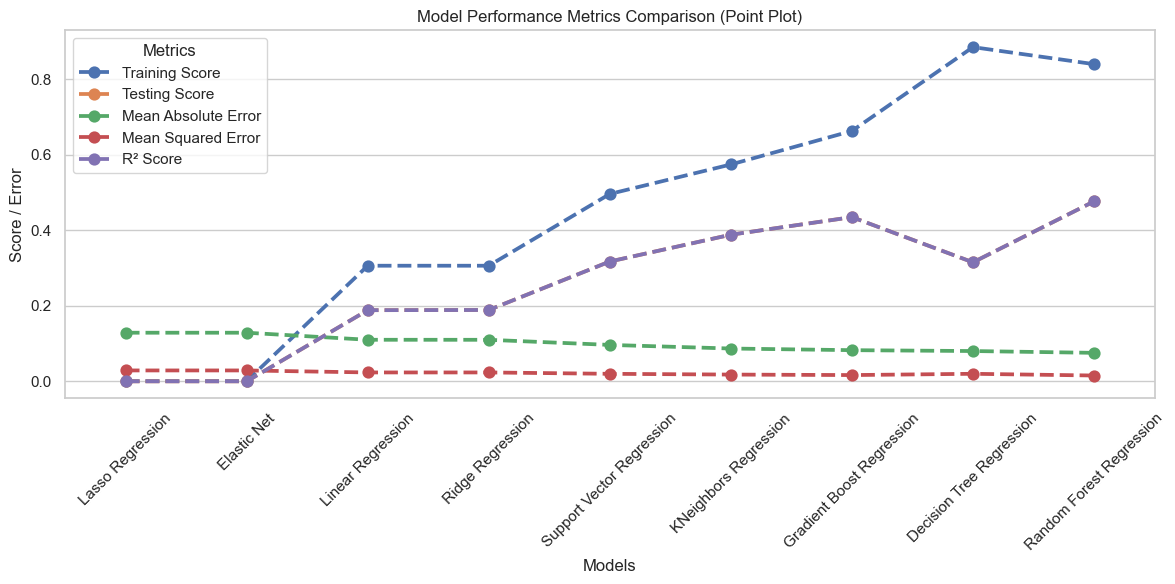

In [14]:
# Reset the index to bring 'Model' back as a column
metrics_df_reset = metrics_df.reset_index()

# Melt the DataFrame for better plotting
metrics_melted = metrics_df_reset.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Model', y='Score', hue='Metric', data=metrics_melted, markers='o', linestyles='--')

# Customize the plot
plt.title('Model Performance Metrics Comparison (Point Plot)')
plt.ylabel('Score / Error')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()

## This Section is Hyper Parameter Tuning for Models to Try to Improve Model Score

In [15]:
# Define parameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Lasso Regression': {
        'regressor__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    'Ridge Regression': {
        'regressor__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    'Random Forest Regression': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__min_samples_leaf': [1, 2],
        'regressor__max_features': ['auto', 'sqrt']
    },
    'Support Vector Regression': {
        'regressor__C': [0.1, 1, 10],
        'regressor__epsilon': [0.1, 0.2, 0.5]
    },
    'Elastic Net': {
        'regressor__alpha': [0.01, 0.1, 1.0],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    },
    'Decision Tree Regression': {
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__min_samples_leaf': [1, 2]
    },
    'Gradient Boost Regression': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'KNeighbors Regression': {
        'regressor__n_neighbors': [3, 5, 10],
        'regressor__weights': ['uniform', 'distance']
    }
}

tuning_results = tune_models(pipelines, param_grids, X_train, y_train)

# Print tuning results
print("\nTuning Results:")
print("=" * 50)  # Separator line
for model_name, result in tuning_results.items():
    best_params = result['best_params']
    best_score = result['best_score']
    
    # Format the parameters for better readability
    params_str = ', '.join([f"{key}: {value}" for key, value in best_params.items()])
    
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {params_str}")
    print(f"  Best Score (Neg MSE): {best_score:.4f}")
    print("-" * 50)  # Separator line

Tuning Linear Regression...
Tuning Lasso Regression...
Tuning Ridge Regression...
Tuning Random Forest Regression...
Tuning Support Vector Regression...
Tuning Elastic Net...
Tuning Decision Tree Regression...
Tuning Gradient Boost Regression...
Tuning KNeighbors Regression...

Tuning Results:
Model: Linear Regression
  Best Parameters: 
  Best Score (Neg MSE): -0.0242
--------------------------------------------------
Model: Lasso Regression
  Best Parameters: regressor__alpha: 0.01
  Best Score (Neg MSE): -0.0236
--------------------------------------------------
Model: Ridge Regression
  Best Parameters: regressor__alpha: 10.0
  Best Score (Neg MSE): -0.0222
--------------------------------------------------
Model: Random Forest Regression
  Best Parameters: regressor__max_depth: 20, regressor__max_features: sqrt, regressor__min_samples_leaf: 2, regressor__min_samples_split: 2, regressor__n_estimators: 200
  Best Score (Neg MSE): -0.0152
---------------------------------------------

In [16]:
fitted_models = {}

for model_name, result in tuning_results.items():
    best_params = result['best_params']
    fitted_model = create_and_fit_model(model_name, best_params, X_train, y_train, pipelines)
    fitted_models[model_name] = fitted_model  # Store the fitted model

In [37]:
fitted_metrics_df = evaluate_models(fitted_models, X_train, y_train, X_test, y_test)

X_train shape: (897, 10)
y_train shape: (897, 1)
X_test shape: (300, 10)
y_test shape: (300, 1)
                           Training Score  Testing Score  Mean Absolute Error  Mean Squared Error  R² Score
Linear Regression                0.306007       0.188046             0.109552            0.022864  0.188046
Lasso Regression                 0.254333       0.170077             0.109296            0.023370  0.170077
Ridge Regression                 0.305275       0.191695             0.108875            0.022761  0.191695
Elastic Net                      0.303058       0.193400             0.108250            0.022713  0.193400
Support Vector Regression        0.496357       0.317175             0.095912            0.019228  0.317175
KNeighbors Regression            0.514701       0.323550             0.089639            0.019048  0.323550
Decision Tree Regression         0.748720       0.345696             0.082957            0.018425  0.345696
Gradient Boost Regression        0.73741

In [38]:
# Combine original and fitted metrics into a single DataFrame for comparison
comparison_df = pd.concat([metrics_df, fitted_metrics_df], axis=1)

# Create a multi-level column index
comparison_df.columns = pd.MultiIndex.from_tuples([
    ('Original', 'Training Score'),
    ('Original', 'Testing Score'),
    ('Original', 'MAE'),
    ('Original', 'MSE'),
    ('Original', 'R² Score'),
    ('Fitted', 'Training Score'),
    ('Fitted', 'Testing Score'),
    ('Fitted', 'MAE'),
    ('Fitted', 'MSE'),
    ('Fitted', 'R² Score'),
])

# Display the comparison DataFrame
print(comparison_df.to_string(index=True))

                                Original                                                     Fitted                                            
                          Training Score Testing Score       MAE       MSE  R² Score Training Score Testing Score       MAE       MSE  R² Score
Lasso Regression                0.000000     -0.000685  0.128256  0.028178 -0.000685       0.254333      0.170077  0.109296  0.023370  0.170077
Elastic Net                     0.000000     -0.000685  0.128256  0.028178 -0.000685       0.303058      0.193400  0.108250  0.022713  0.193400
Linear Regression               0.306007      0.188046  0.109552  0.022864  0.188046       0.306007      0.188046  0.109552  0.022864  0.188046
Ridge Regression                0.305997      0.188579  0.109464  0.022849  0.188579       0.305275      0.191695  0.108875  0.022761  0.191695
Support Vector Regression       0.496357      0.317175  0.095912  0.019228  0.317175       0.496357      0.317175  0.095912  0.019228  0

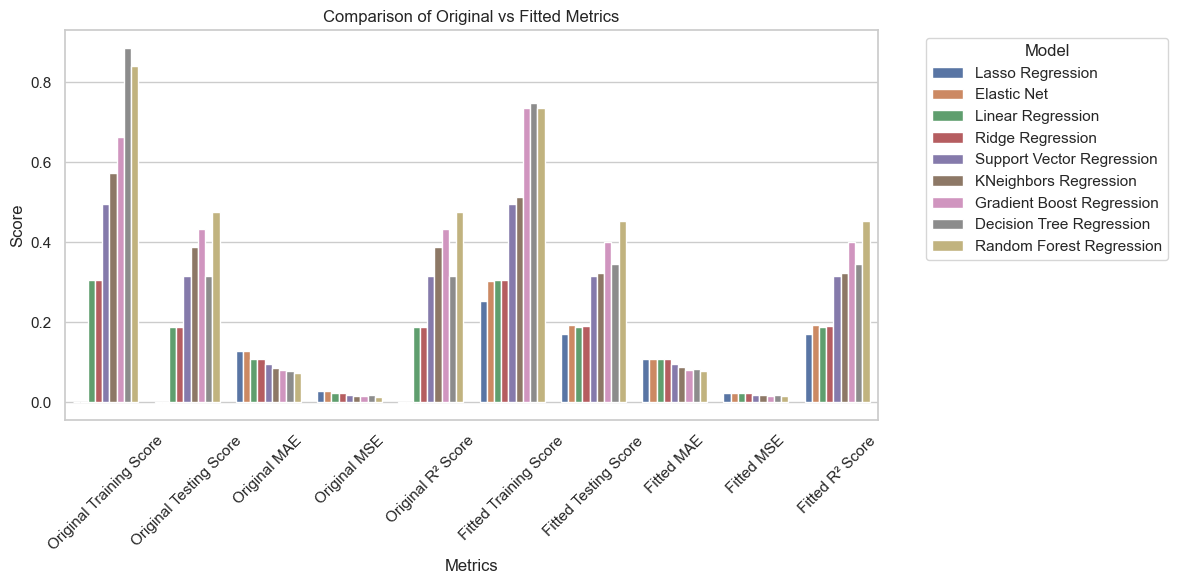

In [44]:
# Assuming comparison_df is your DataFrame with multi-level columns
# Reset the index to have a flat DataFrame for plotting
comparison_flat = comparison_df.reset_index()

# Flatten the MultiIndex columns
comparison_flat.columns = ['Model'] + [f'{level_0} {level_1}' for level_0, level_1 in comparison_flat.columns[1:]]

# Melt the DataFrame to long format for Seaborn
comparison_melted = comparison_flat.melt(id_vars='Model', var_name='Metric Type', value_name='Score')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted, x='Metric Type', y='Score', hue='Model', ci=None)

# Customize the plot
plt.title('Comparison of Original vs Fitted Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better fit
plt.show()

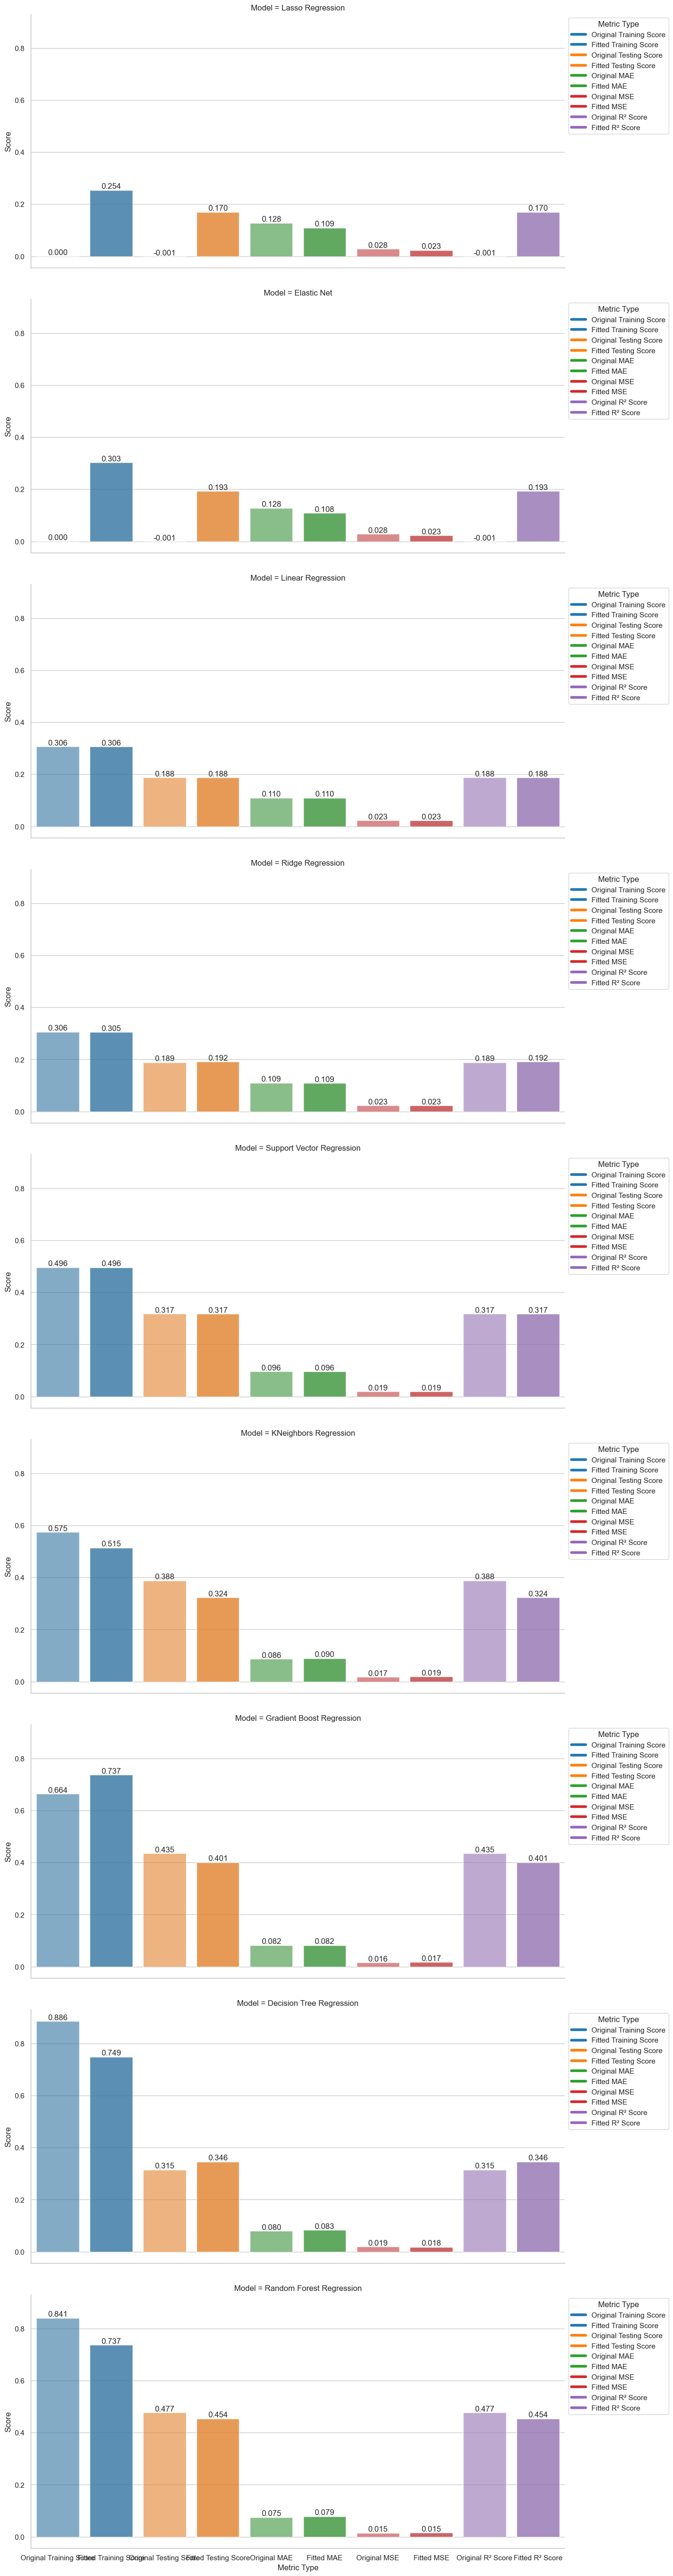

In [56]:
# Example metric color mapping
metric_color_map = {
    'Original Training Score': '#1f77b4',  # Blue
    'Fitted Training Score': '#1f77b4',    # Same base color
    'Original Testing Score': '#ff7f0e',   # Orange
    'Fitted Testing Score': '#ff7f0e',     # Same base color
    'Original MAE': '#2ca02c',             # Green
    'Fitted MAE': '#2ca02c',               # Same base color
    'Original MSE': '#d62728',             # Red
    'Fitted MSE': '#d62728',               # Same base color
    'Original R² Score': '#9467bd',        # Purple
    'Fitted R² Score': '#9467bd',          # Same base color
}

# Create a FacetGrid to plot separate graphs for each model
g = sns.FacetGrid(filtered_data, col='Model', hue='Metric Type', height=6, aspect=2, col_wrap=1)

# Map a bar plot to each facet
for ax in g.axes.flat:
    for metric_type in metrics_to_plot:
        # Filter data for the current metric type
        model_name = ax.get_title().split(' = ')[1]  # Get the model name from the title
        model_data = filtered_data[(filtered_data['Model'] == model_name) & 
                                   (filtered_data['Metric Type'] == metric_type)]  # Filter for the specific model
        
        # Plot only if there is data for the current metric type and model
        if not model_data.empty:
            shade = 0.6 if 'Original' in metric_type else 0.8  # Slightly darker for fitted metrics
            color = metric_color_map.get(metric_type, 'gray')  # Get the color from the mapping
            sns.barplot(x='Metric Type', y='Score', data=model_data, 
                        alpha=shade, color=color, ax=ax)

# Add metric names on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')

# Create a custom legend for each ax
for ax in g.axes.flat:
    handles = [plt.Line2D([0], [0], color=metric_color_map[metric], lw=4) for metric in metric_color_map.keys()]
    labels = list(metric_color_map.keys())
    ax.legend(handles=handles, labels=labels, title='Metric Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()